<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week4.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Softmax回归实验**

In [1]:
import random
import matplotlib.pyplot as plt

import numpy as np

import torch
from torch import nn,optim
from torch.utils.data import Dataset,TensorDataset,DataLoader

In [2]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchlearning import *

##**一、Softmax手动实现**

###**1.数据集生成**

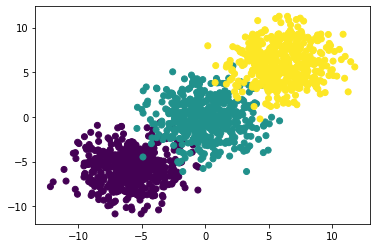

In [3]:
torch.manual_seed(420)

features,labels = tensorGenCla(bias=True,deg_dispersion=[6,2])
plt.scatter(features[:,0],features[:,1],c=labels)

In [4]:
labels.shape

torch.Size([1500, 1])

###**2.建模过程**

In [5]:
def softmax(X,w):
  m = torch.exp(torch.mm(X,w))
  sp = torch.sum(m,1).reshape(-1,1)
  return m/sp

In [6]:
def m_cross_entropy(soft_z,y):
  y = y.long()
  prob_real = torch.gather(soft_z,1,y)
  return (-(1/y.numel())*torch.log(prob_real).sum())

In [12]:
def sgd(params,lr):
  params.data -= params.grad*lr
  params.grad.zero_()

def m_accuracy(soft_z,y):
  acc_bool = torch.argmax(soft_z,1).flatten() == y.flatten()  # argmax函数返回最大值的索引
  acc_mean = torch.mean(acc_bool.float())
  return acc_mean

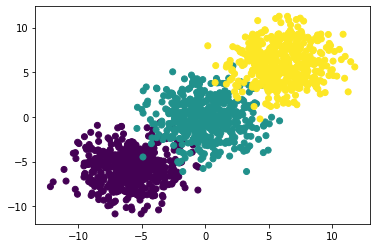

In [10]:
torch.manual_seed(420)

features, labels = tensorGenCla(bias=True,deg_dispersion=[6,2])
plt.scatter(features[:,0],features[:,1],c=labels);

In [16]:
torch.manual_seed(420)

batch_size = 10
lr = 0.03
num_epochs = 3
w = torch.randn(3,3,requires_grad=True)

net = softmax
loss = m_cross_entropy

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X,w),y)
    l.backward()
    sgd(w,lr)
  train_acc = m_accuracy(net(features,w),labels)
  print("epoch %d, acc %f" % (epoch+1,train_acc))

epoch 1, acc 0.829333
epoch 2, acc 0.938667
epoch 3, acc 0.953333


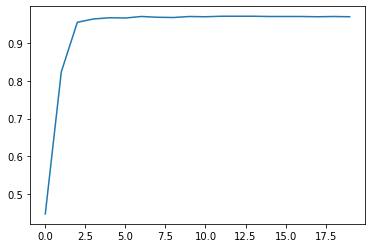

In [17]:
torch.manual_seed(420)

batch_size = 10
lr = 0.03
num_epochs = 20
w = torch.randn(3,3,requires_grad=True)

train_acc = []

net = softmax
loss = m_cross_entropy

for i in range(num_epochs):
  for epoch in range(i):
    for X,y in data_iter(batch_size,features,labels):
      l = loss(net(X,w),y)
      l.backward()
      sgd(w,lr)
  train_acc.append(m_accuracy(net(features,w),labels))

plt.plot(list(range(num_epochs)),train_acc)

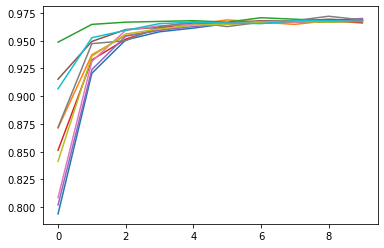

In [20]:
# 不使用随机种子，初始结果会不同，但结果准确率趋于一致
for i in range(num_epochs):
  w = torch.randn(3,3,requires_grad=True)
  train_acc = []
  for epoch in range(10):
    for X,y in data_iter(batch_size,features,labels):
      l = loss(net(X,w),y)
      l.backward()
      sgd(w,lr)
    train_acc.append(m_accuracy(net(features,w),labels))
  plt.plot(list(range(num_epochs)),train_acc)

####**gather函数使用方法**

In [ ]:
f = torch.tensor([[0.6,0.2,0.2],[0.3,0.4,3]])
l = torch.tensor([0,1])

In [ ]:
torch.gather(f,1,l.reshape(-1,1)) # 批量索引

tensor([[0.6000],
        [0.4000]])

In [ ]:
-1/2 * (torch.log(torch.tensor(0.6))+torch.log(torch.tensor(0.4)))

tensor(0.7136)

In [ ]:
m_cross_entropy(f,l.reshape(-1,1).long())

tensor(0.7136)

##**二、Softmax回归的快速实现**

In [39]:
batch_size = 10
lr = 0.03
num_epochs = 3

In [40]:
# 数据处理
torch.manual_seed(420)
features,labels = tensorGenCla(deg_dispersion=[6,2])
labels = labels.float()
data = TensorDataset(features,labels)
batchData = DataLoader(data,batch_size=batch_size,shuffle=True)

In [41]:
features  # 最好不要加bias的那一列

tensor([[-6.0141, -4.9911],
        [-4.6593, -6.7657],
        [-5.9395, -5.2347],
        ...,
        [ 6.4622,  4.1406],
        [ 5.7278,  9.2208],
        [ 4.9705,  3.1236]])

In [53]:
class softmaxR(nn.Module):
  def __init__(self,in_features=2,out_features=3,bias=False):
    super(softmaxR,self).__init__()
    self.linear = nn.Linear(in_features,out_features)

  def forward(self,x):
    out = self.linear(x)
    return out

softmax_model = softmaxR()

In [54]:
criterion = nn.CrossEntropyLoss()

In [55]:
optimizer = optim.SGD(softmax_model.parameters(),lr=lr)

In [56]:
def fit(net,criterion,optimizer,batchdata,epochs):
  for epoch in range(epochs):
    for X,y in batchdata:
      zhat = net.forward(X)
      y = y.flatten().long()
      loss = criterion(zhat,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [57]:
fit(  net=softmax_model,
    criterion=criterion,
    optimizer=optimizer,
    batchdata=batchData,
    epochs=num_epochs)

In [59]:
criterion(softmax_model(features),labels.flatten().long())

tensor(0.1660, grad_fn=<NllLossBackward0>)

In [58]:
m_accuracy(torch.softmax(softmax_model(features),1),labels)

tensor(0.9573)

In [60]:
# 数据处理
torch.manual_seed(420)
features,labels = tensorGenCla(deg_dispersion=[6,4])
labels = labels.float()
data = TensorDataset(features,labels)
batchData = DataLoader(data,batch_size=batch_size,shuffle=True)

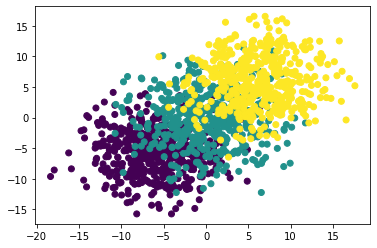

In [61]:
plt.scatter(features[:,0],features[:,1],c=labels)